##Drive - pobranie danych

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
import pandas as pd

df = None
directory = 'drive/MyDrive/PoliTweets'

files = Path(directory).glob('*')
for file in files:
  if df is None:
    df = pd.read_csv(file)
  else:
    df = pd.concat([df, pd.read_csv(file)], axis=0)


print(df)

    Unnamed: 0             tweet_id              user_id party  \
0            0  1415369225942835201  1215621424834064384   PiS   
1            1  1435648353577152512  1215621424834064384   PiS   
2            2  1383364227646201863  1215621424834064384   PiS   
3            3  1446228117761232903  1215621424834064384   PiS   
4            4  1384526319183085569  1215621424834064384   PiS   
..         ...                  ...                  ...   ...   
95          95  1374849879617499145  1159563950549348352   PiS   
96          96  1434430301615362049  1159563950549348352   PiS   
97          97  1355491887268978689  1159563950549348352   PiS   
98          98  1386416405961003010  1159563950549348352   PiS   
99          99  1367955345931448331  1159563950549348352   PiS   

               topics                                               text  
0          TSUE|UE|TK  @KonradPogoda @CzarnekP To wie pan też zapewne...  
1              LexTVN  @MarekS98837118 @Mariamarta410 Roz

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

##Funkcje do oczyszczania danych

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=aaba2b199c6853bada8779bb2c284a93c6a5aacf237577434af21d548b368962
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji


In [ ]:
import re
import emoji

df = df.dropna(axis = 0, how = 'any')

def remove_links(text):
  link_pattern = re.compile(r'https://t.co/\S+')
  result = link_pattern.sub('', text)
  return result

def to_lowercase(text):
    return text.lower()

def remove_newlines(text):
    return text.replace('\n', '')

def remove_emoji(text):
  return emoji.replace_emoji(text, "")

def emoji_to_text(text):
  return emoji.demojize(text)

def remove_tags(text):
  return re.sub(r'@[a-zA-Z0-9_]{0,15}:?', '', text)

##Co jest w danych?

In [ ]:
print(f'Liczba tweetów to {len(df)}')

Liczba tweetów to 123513


<Axes: >

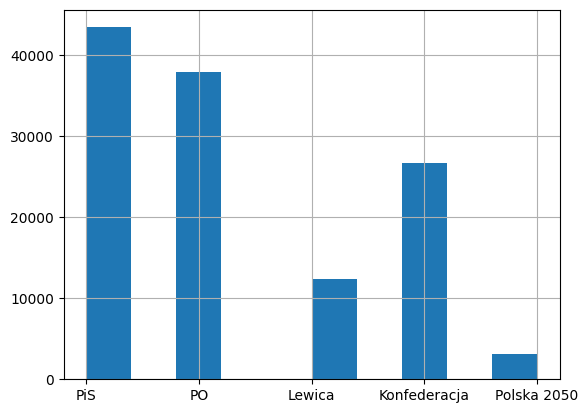

In [ ]:
df['party'].hist()

In [ ]:
df['party'].value_counts()

PiS             43458
PO              37888
Konfederacja    26709
Lewica          12371
Polska 2050      3087
Name: party, dtype: int64

##Najbardziej aktywni użytkownicy

Teraz możemy stworzyć listę 20 najbardziej aktywnych (w liczbie tweetów) użytkowników danej partii:

In [ ]:
all_parties = list(df['party'].unique())
list_of_top_user = list()

for party in all_parties:
  party_tweets = df.loc[df['party'] == party]
  list_of_top_user.extend(list(dict(party_tweets['user_id'].value_counts()[:20]).keys()))

In [ ]:
len(list_of_top_user)

100

##Stworzenie datasetu:

In [ ]:
data_df = df.loc[df['user_id'].isin(list_of_top_user)]
data_df

tweet_id              user_id         party             topics  \
66  1435775827015315458  1221969871371677701  Konfederacja  LexTVN:TSUE|UE|TK   
67  1387941058101878784  1221969871371677701  Konfederacja            Aborcja   
68  1428473265060814848  1221969871371677701  Konfederacja             LexTVN   
69  1374887084859793411  1221969871371677701  Konfederacja            Aborcja   
70  1372001242625536008  1221969871371677701  Konfederacja             LexTVN   
..                  ...                  ...           ...                ...   
95  1439186036123394052  1307626595033714688            PO         TSUE|UE|TK   
96  1450486262318567444  1307626595033714688            PO         TSUE|UE|TK   
97  1415354502736224262  1307626595033714688            PO         TSUE|UE|TK   
98  1446145532754341895  1307626595033714688            PO         TSUE|UE|TK   
99  1449375950328811523  1307626595033714688            PO         TSUE|UE|TK   

                                                 text  
66  #Polexit Brak robotników z Polski. Niemieckie ...  
67  @strajkkobiet @Lewica Bida zesrała się i płacz...  
68  @Andruszkiewicz1 TVN poszukuje tanich pracowni...  
69  @tvp_info Pod hasłami obrony praw kobiet zaprz...  
70  @gambitek @Farma1956 @chili_mus @KamilDziubka ...  
..                                                ...  
95  @radekfogiel Kiedy Kaczyński chce wyprowadzić ...  
96  @wPolityce_pl Sojusz Putin Orban Kaczyński cor...  
97  @GiertychRoman Glapinski dodrukuje kolejne mil...  
98  @PiotrMuller @MorawieckiM Czy rolnicy zadowole...  
99  @Padrino0022 @BParyska Ciekawe czy rolnicy zad...  

[11157 rows x 5 columns]

In [ ]:
data_df = data_df.dropna(subset=['text'])

<Axes: >

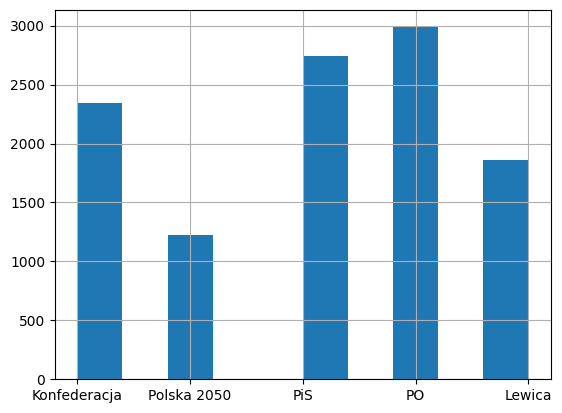

In [ ]:
data_df['party'].hist()

In [ ]:
len(data_df['user_id'].unique())

100

In [ ]:
sorted_df = data_df.sort_values('user_id')
newlist = []
a = 1
n = None
for _, row in sorted_df.iterrows():
  if row['user_id'] != n:
    newlist.append([row['user_id'], row['text']])
    n = row['user_id']
  else:
    if a%3 == 2:
      newlist.append([row['user_id'], row['text']])
    else:
      newlist[-1][1] = " ".join([newlist[-1][1], row['text']])
  a += 1
  a = a % 3

In [ ]:
newlist[0]

[29960736,
 '🤦\u200d♂️Właśnie się dowiedziałem, że prawo EU nie chroni najbardziej rozpoznawalnego polskiego wyrobu regionalnego.\nNie będzie #TSUE nam mówiło co mamy robić, jak EU nie chroni najlepszego majonezu ever❗\n✊Majonez Kielecki albo Unia❗\n@JKowalski_posel mam rację?\n😋 https://t.co/3wz0VFBtiq']

In [ ]:
grouped = pd.DataFrame(newlist, columns = ['user_id', 'text'])

In [ ]:
grouped

user_id                                               text
0                29960736  🤦‍♂️Właśnie się dowiedziałem, że prawo EU nie ...
1                29960736  No to ja proszę #StrajkKobiet nie idźcie tą dr...
2                29960736  #TrybunalKonstytucyjny opublikował #uzasadnien...
3                29960736  ⏩Jak nazwać głosowanie nad ograniczeniem najwi...
4                29960736  I ot o chodzi w robieniu polityki.\nMasz pomys...
...                   ...                                                ...
3785  1399848998765268994  @koper_adas @szymon_holownia Śmiem twierdzić, ...
3786  1399848998765268994  @CzeKuku @JbBor5 Tak dotyczy pandemii ale to t...
3787  1399848998765268994  @mycielski @strajkkobiet @WarszawskiSK @martal...
3788  1399848998765268994  @kacperpaciorek_ Nie nie nie. 1. Prasą już się...
3789  1399848998765268994  To jak to jest z tym chłopcem z zatruciem grzy...

[3790 rows x 2 columns]

In [ ]:
grouped = grouped.sample(frac=1).reset_index(drop=True)

In [ ]:
partie = dict(zip(df['user_id'], df['party']))

In [ ]:
grouped['party'] = grouped['user_id'].map(partie)

In [ ]:
new_df = grouped[['text', 'party']]

In [ ]:
new_df

text         party
0     @Izabell83031842 Przecież Hołownia dla TVN to ...            PO
1     @tvn24 I co z tego barany z TVN? Teraz choruje...  Konfederacja
2     Konferencja prasowa ws. ustawy telewizji TVN. ...        Lewica
3     @PIStoLewica @lui_dada @RBakiewicz @RobertWinn...           PiS
4     Właściciele TVN i GW pozyskali z Orlenu ogromn...           PiS
...                                                 ...           ...
3785  @JMiziolek tylko wielki idiota uwierzy że praw...           PiS
3786  @PW58142855 @TOPTVPINFO @WiadomosciTVP Chciałb...            PO
3787  @UwolnicMiernika @RobertChief10 No to jeśli ni...  Konfederacja
3788  @EwaLTylkoPytam @Teresa12369786 Jedyne, co moz...  Konfederacja
3789  @komputerow Ale to ty płaczesz, że uchwalono t...  Konfederacja

[3790 rows x 2 columns]

In [ ]:
party_dict = {'PiS': 0,
        'PO': 1,
        'Konfederacja': 2,
        'Lewica': 3,
        'Polska 2050': 4}

inv_dict = {v: k for k, v in party_dict.items()}

def map_party(text):
  return party_dict[text]
def unmap_party(text):
  return inv_dict[text]

In [ ]:
ndf = new_df[['text', 'party']]
ndf = ndf.rename(columns={'party': 'labels'})
ndf.labels = ndf.labels.apply(map_party)

In [ ]:
ndf

text  labels
0     @Izabell83031842 Przecież Hołownia dla TVN to ...       1
1     @tvn24 I co z tego barany z TVN? Teraz choruje...       2
2     Konferencja prasowa ws. ustawy telewizji TVN. ...       3
3     @PIStoLewica @lui_dada @RBakiewicz @RobertWinn...       0
4     Właściciele TVN i GW pozyskali z Orlenu ogromn...       0
...                                                 ...     ...
3785  @JMiziolek tylko wielki idiota uwierzy że praw...       0
3786  @PW58142855 @TOPTVPINFO @WiadomosciTVP Chciałb...       1
3787  @UwolnicMiernika @RobertChief10 No to jeśli ni...       2
3788  @EwaLTylkoPytam @Teresa12369786 Jedyne, co moz...       2
3789  @komputerow Ale to ty płaczesz, że uchwalono t...       2

[3790 rows x 2 columns]

##Oczyszczenie danych na różne sposoby

In [ ]:
ndf.text = ndf.text.apply(remove_links).apply(to_lowercase).apply(remove_newlines)
df_noemojis_tags = ndf.copy()
df_noemojis_notags = ndf.copy()
df_descemojis_tags = ndf.copy()
df_descemojis_notags = ndf.copy()
df_emojis_tags = ndf.copy()
df_emojis_notags = ndf.copy()
df_noemojis_tags.text = df_noemojis_tags.text.apply(remove_emoji)
df_noemojis_notags.text = df_noemojis_notags.text.apply(remove_emoji).apply(remove_tags)
df_descemojis_tags.text = df_descemojis_tags.text.apply(emoji_to_text)
df_descemojis_notags.text = df_descemojis_notags.text.apply(emoji_to_text).apply(remove_tags)
df_emojis_tags.text = df_emojis_tags.text
df_emojis_notags.text = df_emojis_notags.text.apply(remove_tags)

In [ ]:
df_noemojis_tags

text  labels
0     @izabell83031842 przecież hołownia dla tvn to ...       1
1     @tvn24 i co z tego barany z tvn? teraz choruje...       2
2     konferencja prasowa ws. ustawy telewizji tvn. ...       3
3     @pistolewica @lui_dada @rbakiewicz @robertwinn...       0
4     właściciele tvn i gw pozyskali z orlenu ogromn...       0
...                                                 ...     ...
3785  @jmiziolek tylko wielki idiota uwierzy że praw...       0
3786  @pw58142855 @toptvpinfo @wiadomoscitvp chciałb...       1
3787  @uwolnicmiernika @robertchief10 no to jeśli ni...       2
3788  @ewaltylkopytam @teresa12369786 jedyne, co moz...       2
3789  @komputerow ale to ty płaczesz, że uchwalono t...       2

[3790 rows x 2 columns]

In [ ]:
df_noemojis_notags

text  labels
0      przecież hołownia dla tvn to kolega z pracy. ...       1
1      i co z tego barany z tvn? teraz choruje bezob...       2
2     konferencja prasowa ws. ustawy telewizji tvn. ...       3
3          i dlatego  bronisz tvn? człowieku,  tu  z...       0
4     właściciele tvn i gw pozyskali z orlenu ogromn...       0
...                                                 ...     ...
3785   tylko wielki idiota uwierzy że prawica chce w...       0
3786     chciałbym się dowiedzieć, ile km mniej dróg...       1
3787    no to jeśli nie przejmujemy się konstytucją ...       2
3788    jedyne, co mozna rozsadnie zrobic, bez jalow...       2
3789   ale to ty płaczesz, że uchwalono takie przepi...       2

[3790 rows x 2 columns]

In [ ]:
df_descemojis_tags

text  labels
0     @izabell83031842 przecież hołownia dla tvn to ...       1
1     @tvn24 i co z tego barany z tvn? teraz choruje...       2
2     konferencja prasowa ws. ustawy telewizji tvn. ...       3
3     @pistolewica @lui_dada @rbakiewicz @robertwinn...       0
4     właściciele tvn i gw pozyskali z orlenu ogromn...       0
...                                                 ...     ...
3785  @jmiziolek tylko wielki idiota uwierzy że praw...       0
3786  @pw58142855 @toptvpinfo @wiadomoscitvp chciałb...       1
3787  @uwolnicmiernika @robertchief10 no to jeśli ni...       2
3788  @ewaltylkopytam @teresa12369786 jedyne, co moz...       2
3789  @komputerow ale to ty płaczesz, że uchwalono t...       2

[3790 rows x 2 columns]

In [ ]:
df_descemojis_notags

text  labels
0      przecież hołownia dla tvn to kolega z pracy. ...       1
1      i co z tego barany z tvn? teraz choruje bezob...       2
2     konferencja prasowa ws. ustawy telewizji tvn. ...       3
3          i dlatego  bronisz tvn? człowieku,  tu  z...       0
4     właściciele tvn i gw pozyskali z orlenu ogromn...       0
...                                                 ...     ...
3785   tylko wielki idiota uwierzy że prawica chce w...       0
3786     chciałbym się dowiedzieć, ile km mniej dróg...       1
3787    no to jeśli nie przejmujemy się konstytucją ...       2
3788    jedyne, co mozna rozsadnie zrobic, bez jalow...       2
3789   ale to ty płaczesz, że uchwalono takie przepi...       2

[3790 rows x 2 columns]

In [ ]:
df_emojis_tags

text  labels
0     @izabell83031842 przecież hołownia dla tvn to ...       1
1     @tvn24 i co z tego barany z tvn? teraz choruje...       2
2     konferencja prasowa ws. ustawy telewizji tvn. ...       3
3     @pistolewica @lui_dada @rbakiewicz @robertwinn...       0
4     właściciele tvn i gw pozyskali z orlenu ogromn...       0
...                                                 ...     ...
3785  @jmiziolek tylko wielki idiota uwierzy że praw...       0
3786  @pw58142855 @toptvpinfo @wiadomoscitvp chciałb...       1
3787  @uwolnicmiernika @robertchief10 no to jeśli ni...       2
3788  @ewaltylkopytam @teresa12369786 jedyne, co moz...       2
3789  @komputerow ale to ty płaczesz, że uchwalono t...       2

[3790 rows x 2 columns]

In [ ]:
df_emojis_notags

text  labels
0      przecież hołownia dla tvn to kolega z pracy. ...       1
1      i co z tego barany z tvn? teraz choruje bezob...       2
2     konferencja prasowa ws. ustawy telewizji tvn. ...       3
3          i dlatego  bronisz tvn? człowieku,  tu  z...       0
4     właściciele tvn i gw pozyskali z orlenu ogromn...       0
...                                                 ...     ...
3785   tylko wielki idiota uwierzy że prawica chce w...       0
3786     chciałbym się dowiedzieć, ile km mniej dróg...       1
3787    no to jeśli nie przejmujemy się konstytucją ...       2
3788    jedyne, co mozna rozsadnie zrobic, bez jalow...       2
3789   ale to ty płaczesz, że uchwalono takie przepi...       2

[3790 rows x 2 columns]

##Podzial na train, test, dev

In [ ]:
def podziel(df):
  from sklearn.model_selection import train_test_split
  train_df, df_temp = train_test_split(df, test_size = 0.4)
  test_df, eval_df = train_test_split(df_temp, test_size = 0.5)
  return train_df, test_df, eval_df

In [ ]:
train_df1, test_df1, eval_df1 = podziel(df_noemojis_tags)
train_df2, test_df2, eval_df2 = podziel(df_noemojis_notags)
train_df3, test_df3, eval_df3 = podziel(df_descemojis_tags)
train_df4, test_df4, eval_df4 = podziel(df_descemojis_notags)
train_df5, test_df5, eval_df5 = podziel(df_emojis_tags)
train_df6, test_df6, eval_df6 = podziel(df_emojis_notags)

##Przygotowanie do trenowania

In [ ]:
!pip install -q simpletransformers
!pip install wandb -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 873.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 15.3 MB/s eta 0:00:00

In [ ]:
import wandb
import pandas as pd
wandb.login()
wandb.init(project="Projekt Inżynieria Lingwistyczna")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kvmilos. Use `wandb login --relogin` to force relogin


In [ ]:
!pip install sacremoses
from simpletransformers.classification import ClassificationModel

# Training arguments
train_args = {
    'evaluate_during_training': True,
    'num_train_epochs': 30,
    'save_eval_checkpoints': False,
    'train_batch_size': 32,
    'eval_batch_size': 32,
    'overwrite_output_dir': True,
    'wandb_project': "Projekt Inżynieria Lingwistyczna",
}

# Create a ClassificationModel
model1 = ClassificationModel('herbert', 'allegro/herbert-base-cased', num_labels=5, use_cuda=True, cuda_device=0, args=train_args)
model2 = ClassificationModel('herbert', 'allegro/herbert-base-cased', num_labels=5, use_cuda=True, cuda_device=0, args=train_args)
model3 = ClassificationModel('herbert', 'allegro/herbert-base-cased', num_labels=5, use_cuda=True, cuda_device=0, args=train_args)
model4 = ClassificationModel('herbert', 'allegro/herbert-base-cased', num_labels=5, use_cuda=True, cuda_device=0, args=train_args)
model5 = ClassificationModel('herbert', 'allegro/herbert-base-cased', num_labels=5, use_cuda=True, cuda_device=0, args=train_args)
model6 = ClassificationModel('herbert', 'allegro/herbert-base-cased', num_labels=5, use_cuda=True, cuda_device=0, args=train_args)

Some weights of the model checkpoint at allegro/herbert-base-cased were not used when initializing BertForSequenceClassification: ['cls.sso.sso_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.sso.sso_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification 

Some weights of the model checkpoint at allegro/herbert-base-cased were not used when initializing BertForSequenceClassification: ['cls.sso.sso_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.sso.sso_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification 

##Trenowanie

###Brak emoji, obecność tagów

In [ ]:
model1.train_model(train_df1, eval_df=eval_df1)
result, model_outputs, wrong_predictions = model1.eval_model(test_df1)

  0%|          | 0/2274 [00:00<?, ?it/s]

Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 1 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 2 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 3 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 4 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 5 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 6 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 7 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 8 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 9 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 10 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 11 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 12 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 13 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 14 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 15 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 16 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 17 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 18 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 19 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 20 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 21 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 22 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 23 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 24 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 25 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 26 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 27 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 28 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 29 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/60 [00:00<?, ?it/s]

###Brak emoji, brak tagów

In [ ]:
model2.train_model(train_df2, eval_df=eval_df2)
result, model_outputs, wrong_predictions = model2.eval_model(test_df2)

  0%|          | 0/2274 [00:00<?, ?it/s]

Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 1 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 2 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 3 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 4 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 5 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 6 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 7 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 8 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 9 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 10 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 11 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 12 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 13 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 14 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 15 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 16 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 17 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 18 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 19 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 20 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 21 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 22 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 23 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 24 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 25 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 26 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 27 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 28 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 29 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/60 [00:00<?, ?it/s]

###Opis emoji, obecność tagów

In [ ]:
model3.train_model(train_df3, eval_df=eval_df3)
result, model_outputs, wrong_predictions = model3.eval_model(test_df3)

  0%|          | 0/2274 [00:00<?, ?it/s]

Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 1 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 2 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 3 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 4 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 5 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 6 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 7 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 8 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 9 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 10 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 11 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 12 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 13 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 14 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 15 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 16 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 17 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 18 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 19 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 20 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 21 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 22 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 23 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 24 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 25 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 26 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 27 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 28 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 29 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/60 [00:00<?, ?it/s]

###Opis emoji, brak tagów

In [ ]:
model4.train_model(train_df4, eval_df=eval_df4)
result, model_outputs, wrong_predictions = model4.eval_model(test_df4)

  0%|          | 0/2274 [00:00<?, ?it/s]

Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 1 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 2 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 3 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 4 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 5 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 6 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 7 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 8 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 9 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 10 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 11 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 12 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 13 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 14 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 15 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 16 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 17 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 18 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 19 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 20 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 21 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 22 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 23 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 24 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 25 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 26 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 27 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 28 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 29 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/60 [00:00<?, ?it/s]

###Obecność emoji, obecność tagów

In [ ]:
model5.train_model(train_df5, eval_df=eval_df5)
result, model_outputs, wrong_predictions = model5.eval_model(test_df5)

  0%|          | 0/2274 [00:00<?, ?it/s]

Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 1 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 2 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 3 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 4 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 5 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 6 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 7 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 8 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 9 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 10 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 11 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 12 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 13 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 14 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 15 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 16 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 17 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 18 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 19 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 20 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 21 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 22 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 23 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 24 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 25 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 26 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 27 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 28 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Epoch 29 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/60 [00:00<?, ?it/s]

###Obecność emoji, brak tagów

In [ ]:
model6.train_model(train_df6, eval_df=eval_df6)
result, model_outputs, wrong_predictions = model6.eval_model(test_df6)

  0%|          | 0/2274 [00:00<?, ?it/s]

Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/72 [00:00<?, ?it/s]

##Wyniki
(ostatni run - Emojis, No Tags) nie poleciał do końca, bo wyczerpałem zapasy GPU

https://api.wandb.ai/links/kvmilos/v8owpdbw

Skróty:

E - Emojis

DE - Descriptions of Emojis

NE - No Emojis

T - Tags

NT - No Tags

###mcc (Matthews correlation coefficient)
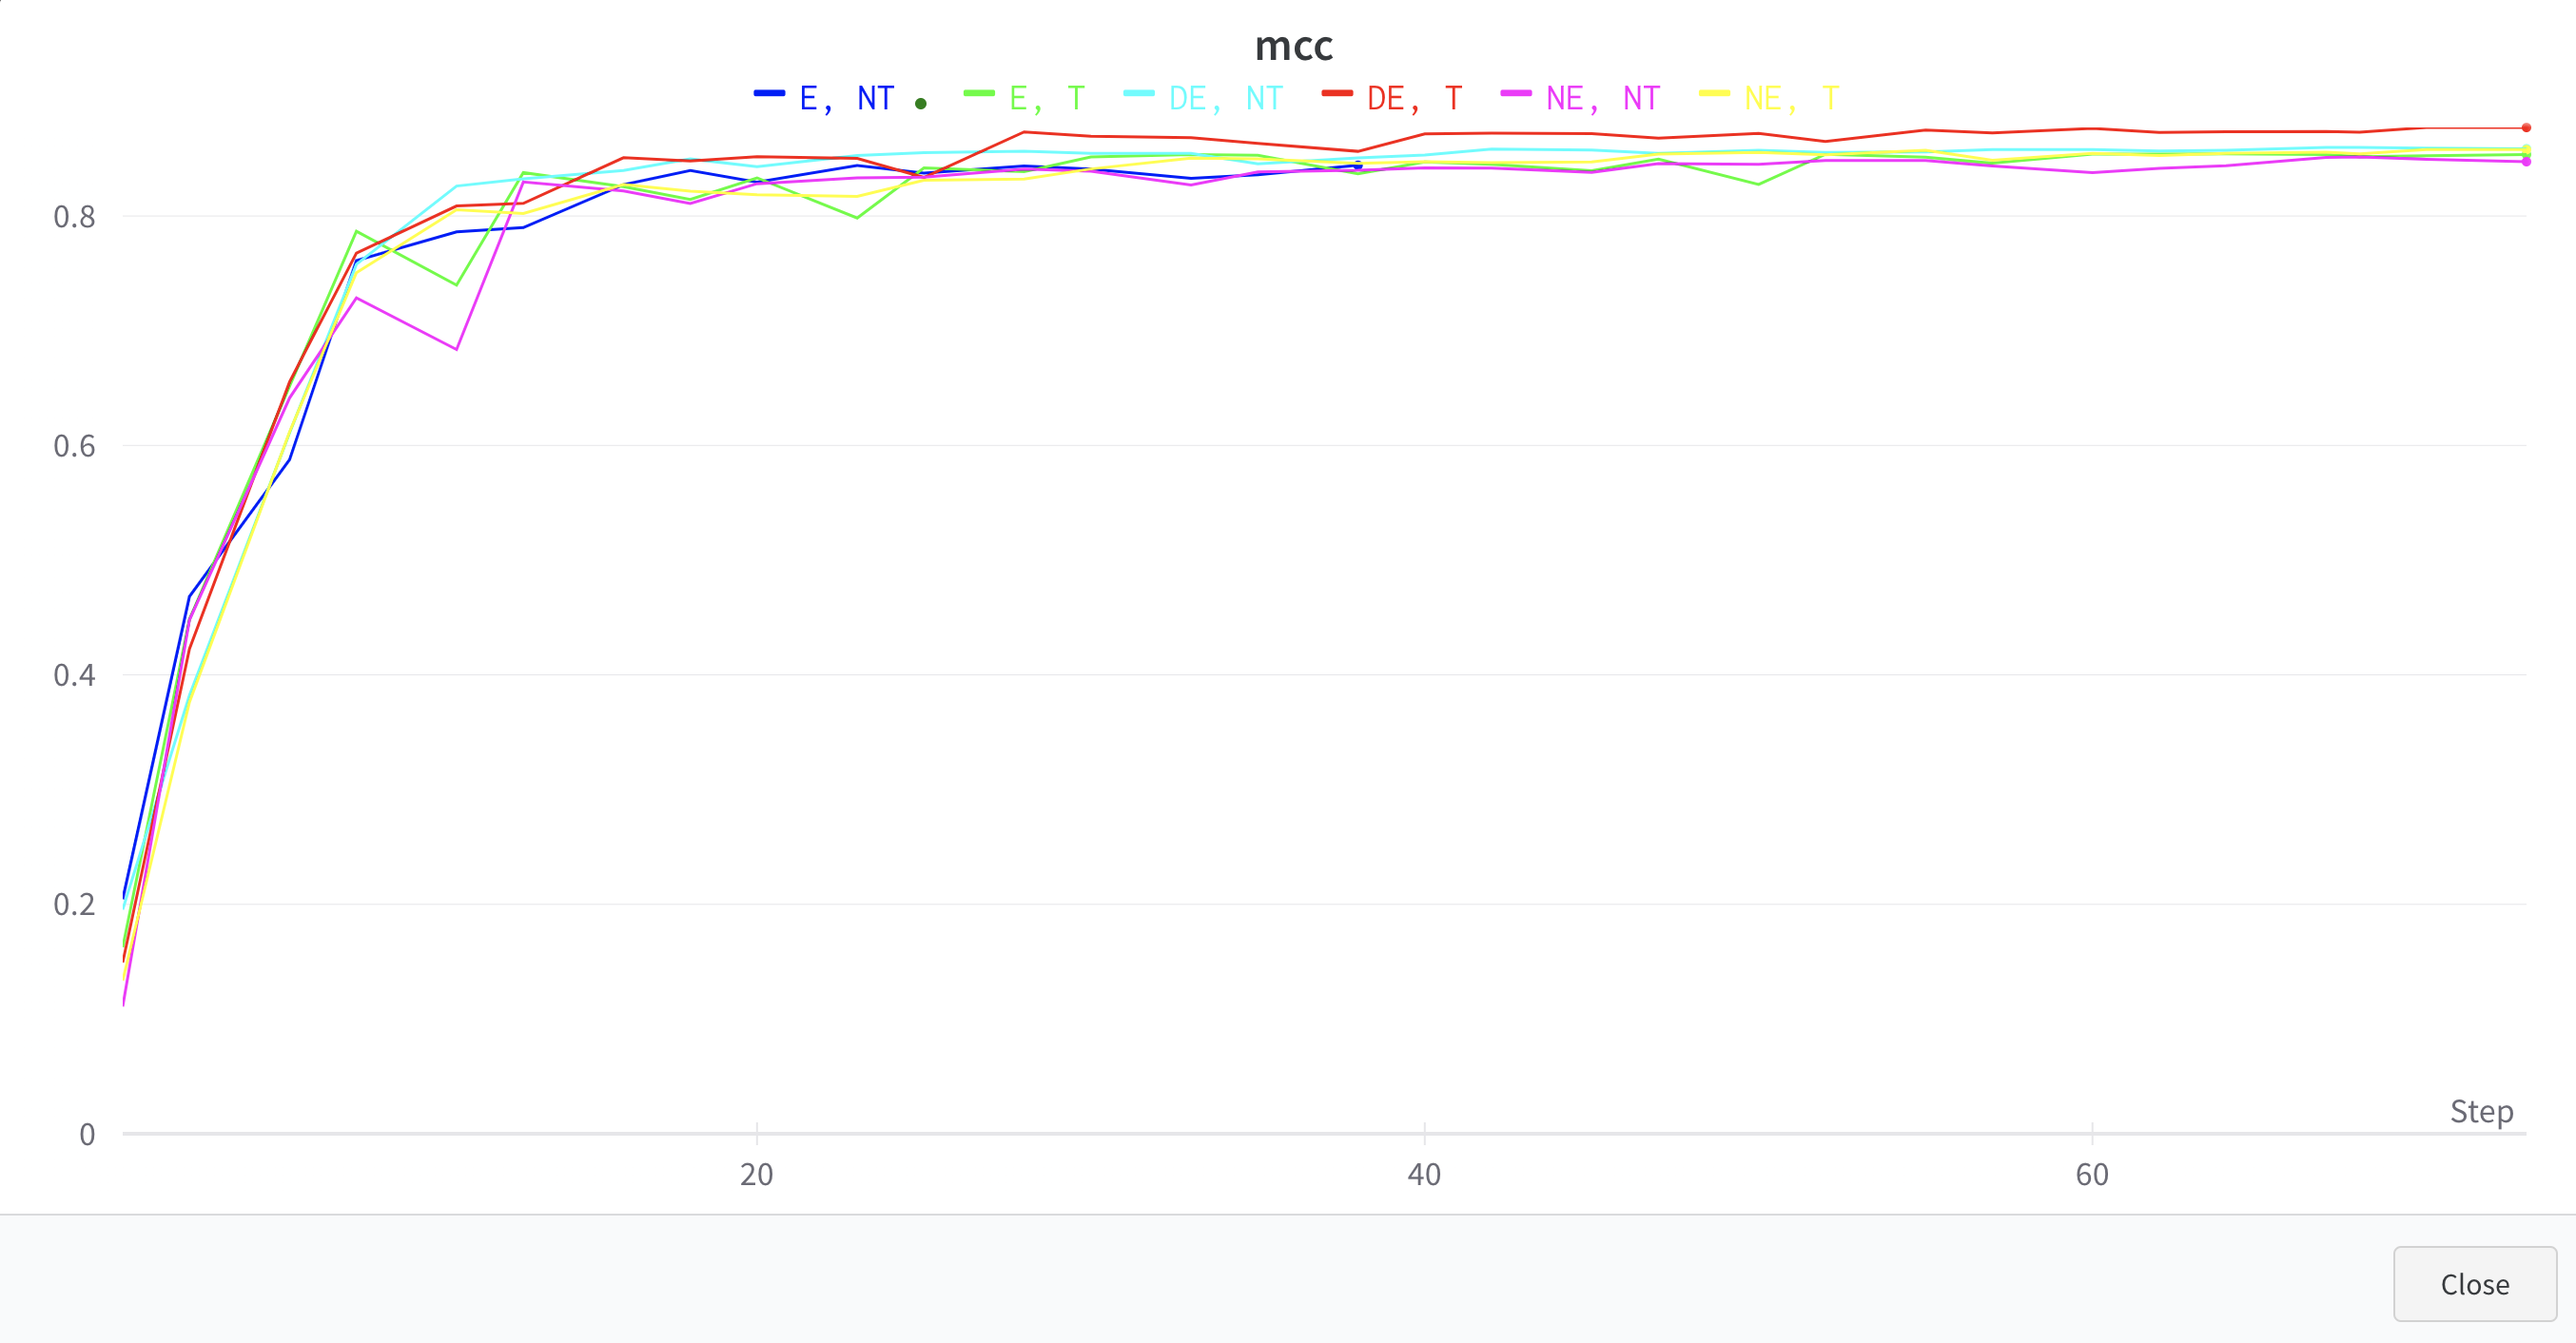

###eval_loss
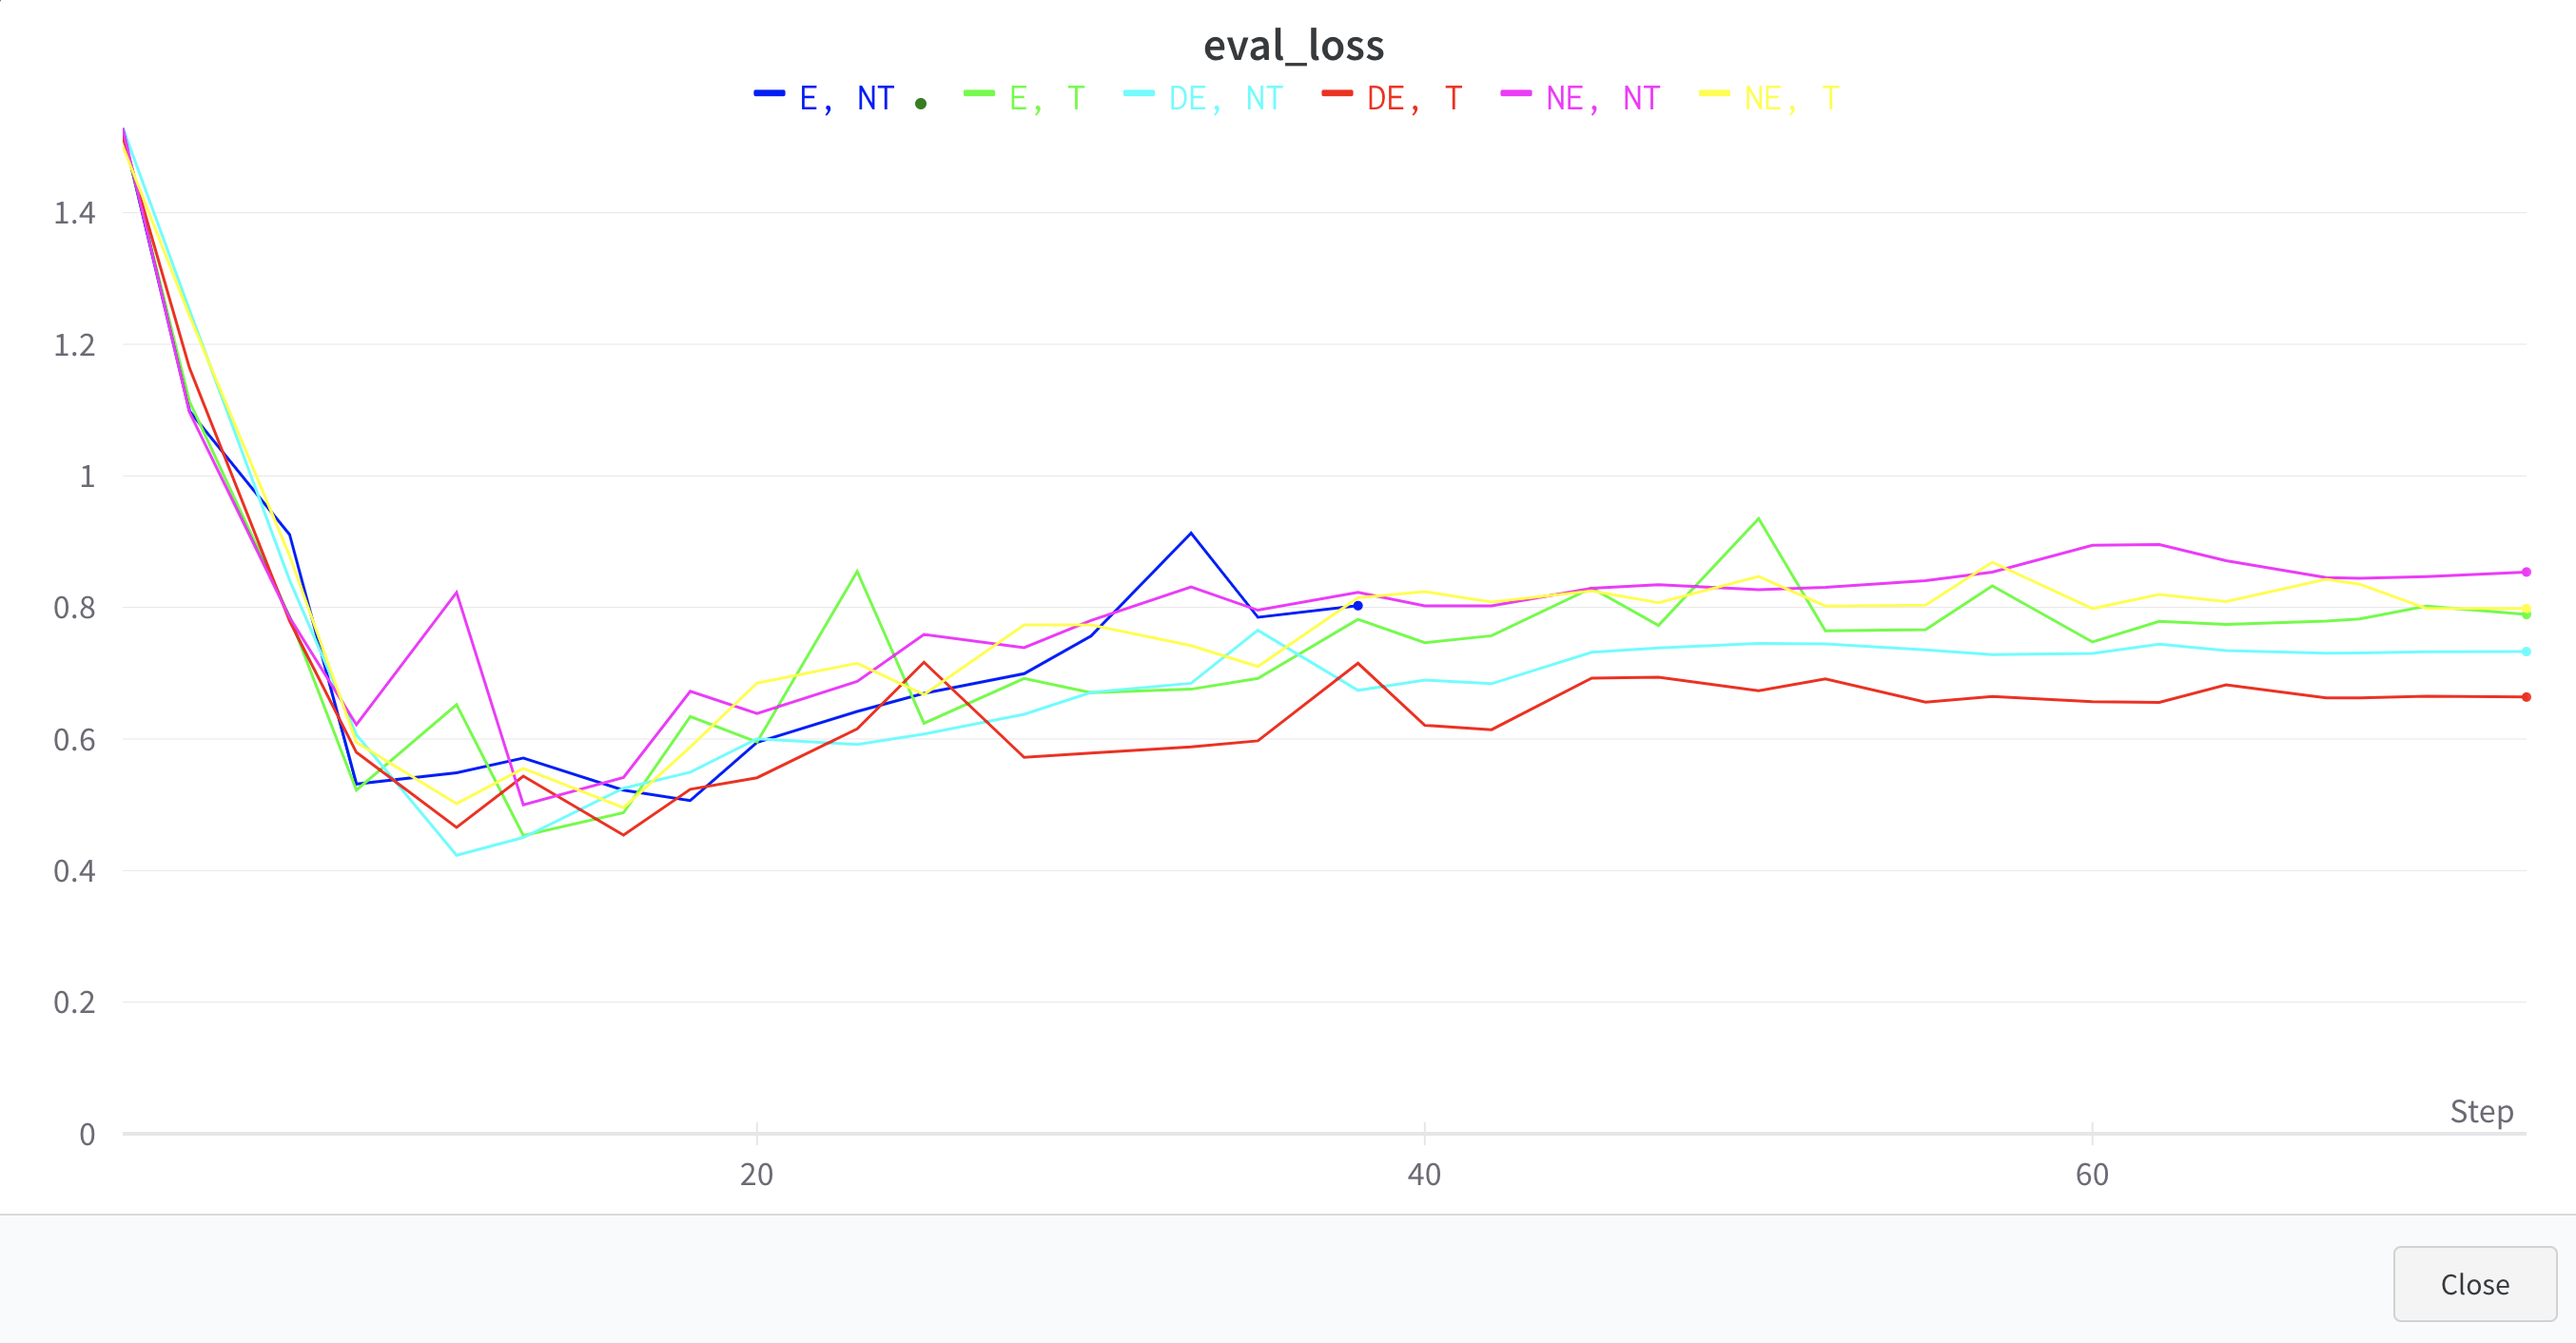

###train_loss
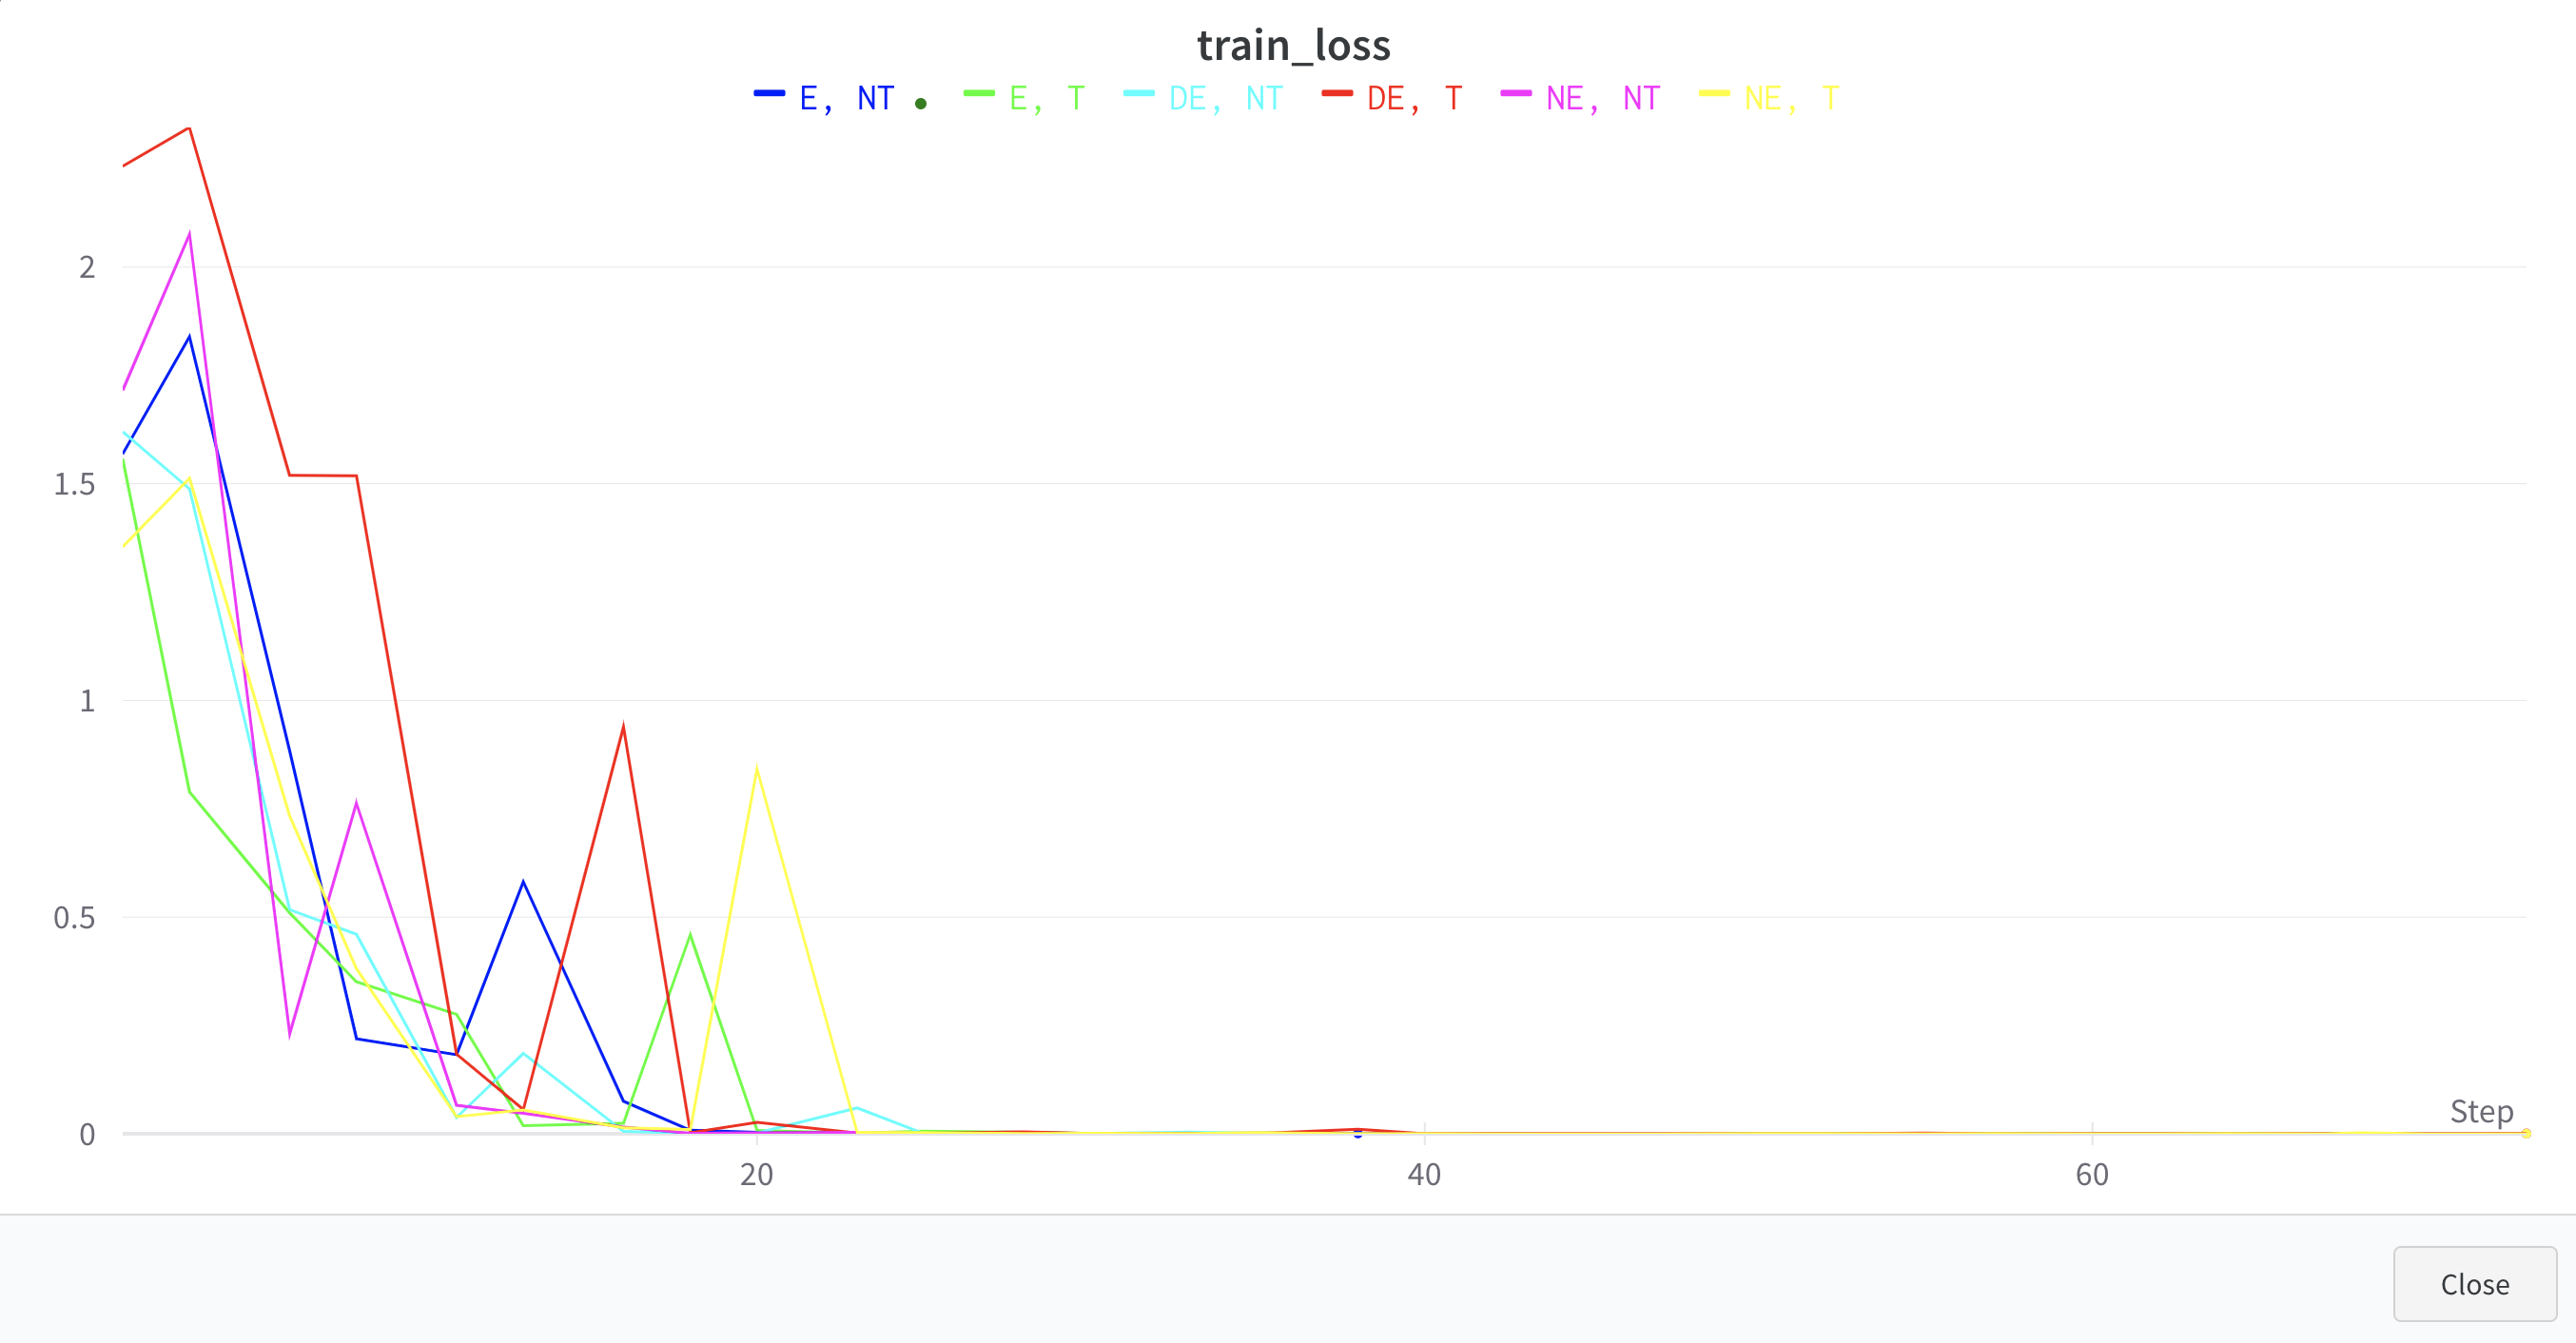

###Training loss
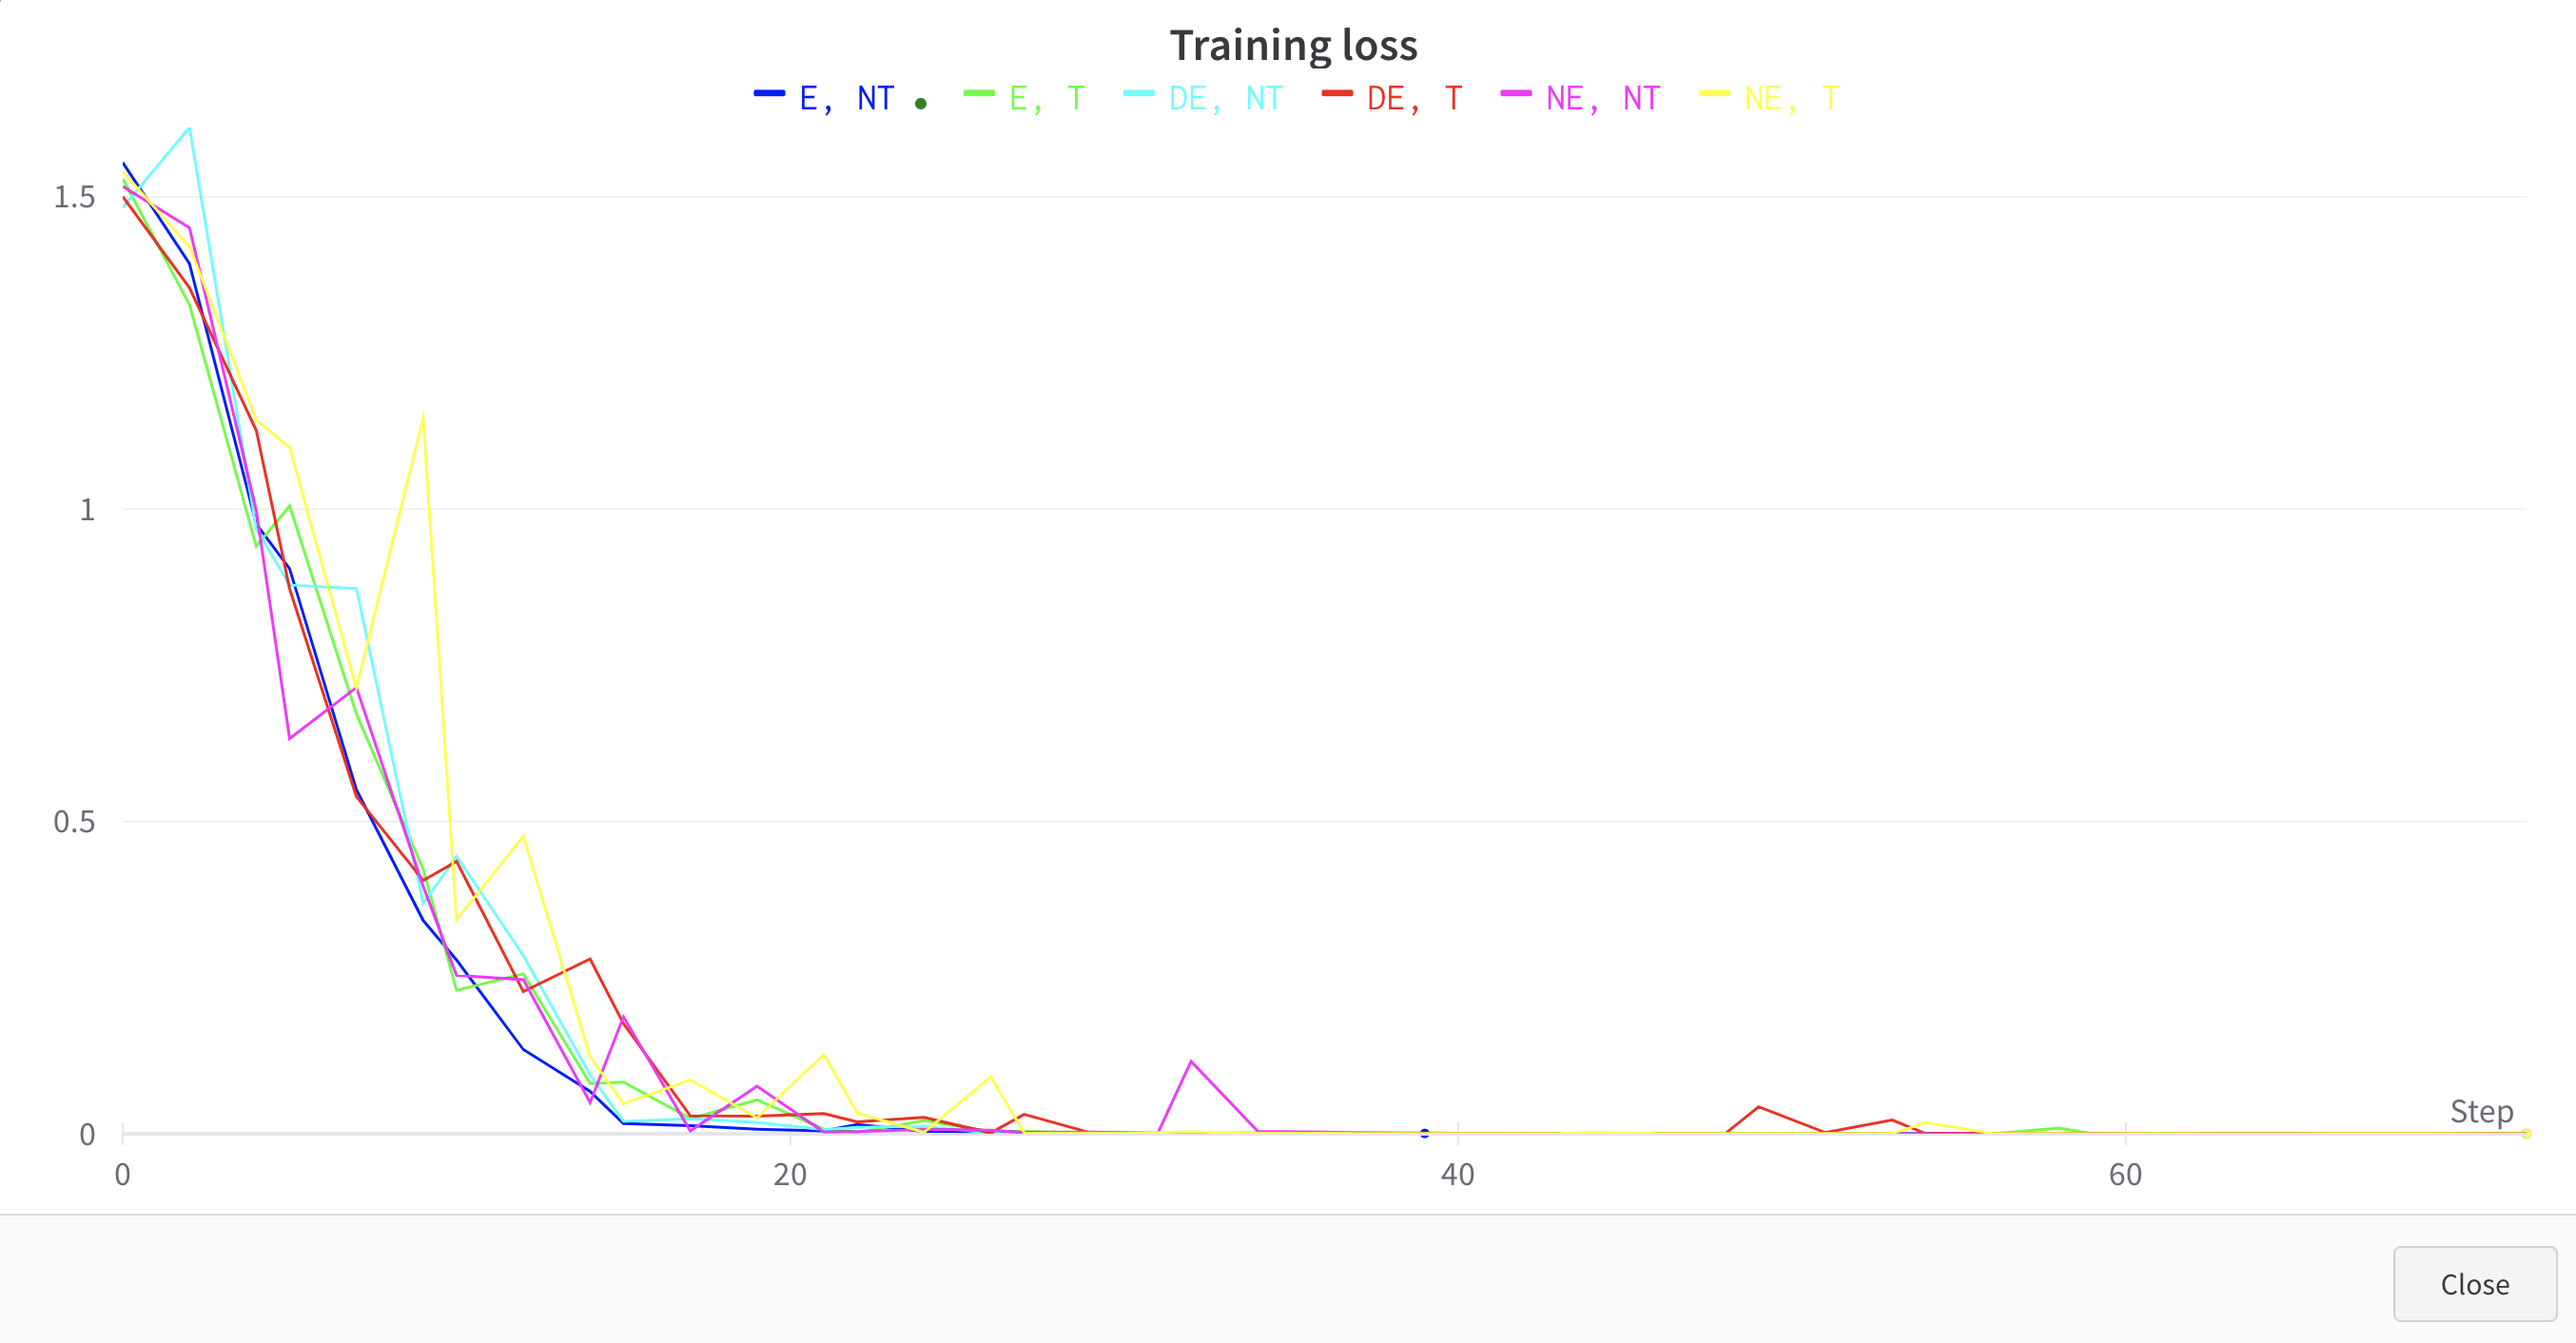

###Confusion matrices
        PiS: 0,
        PO: 1,
        Konfederacja: 2,
        Lewica: 3,
        Polska 2050: 4

####NE, T
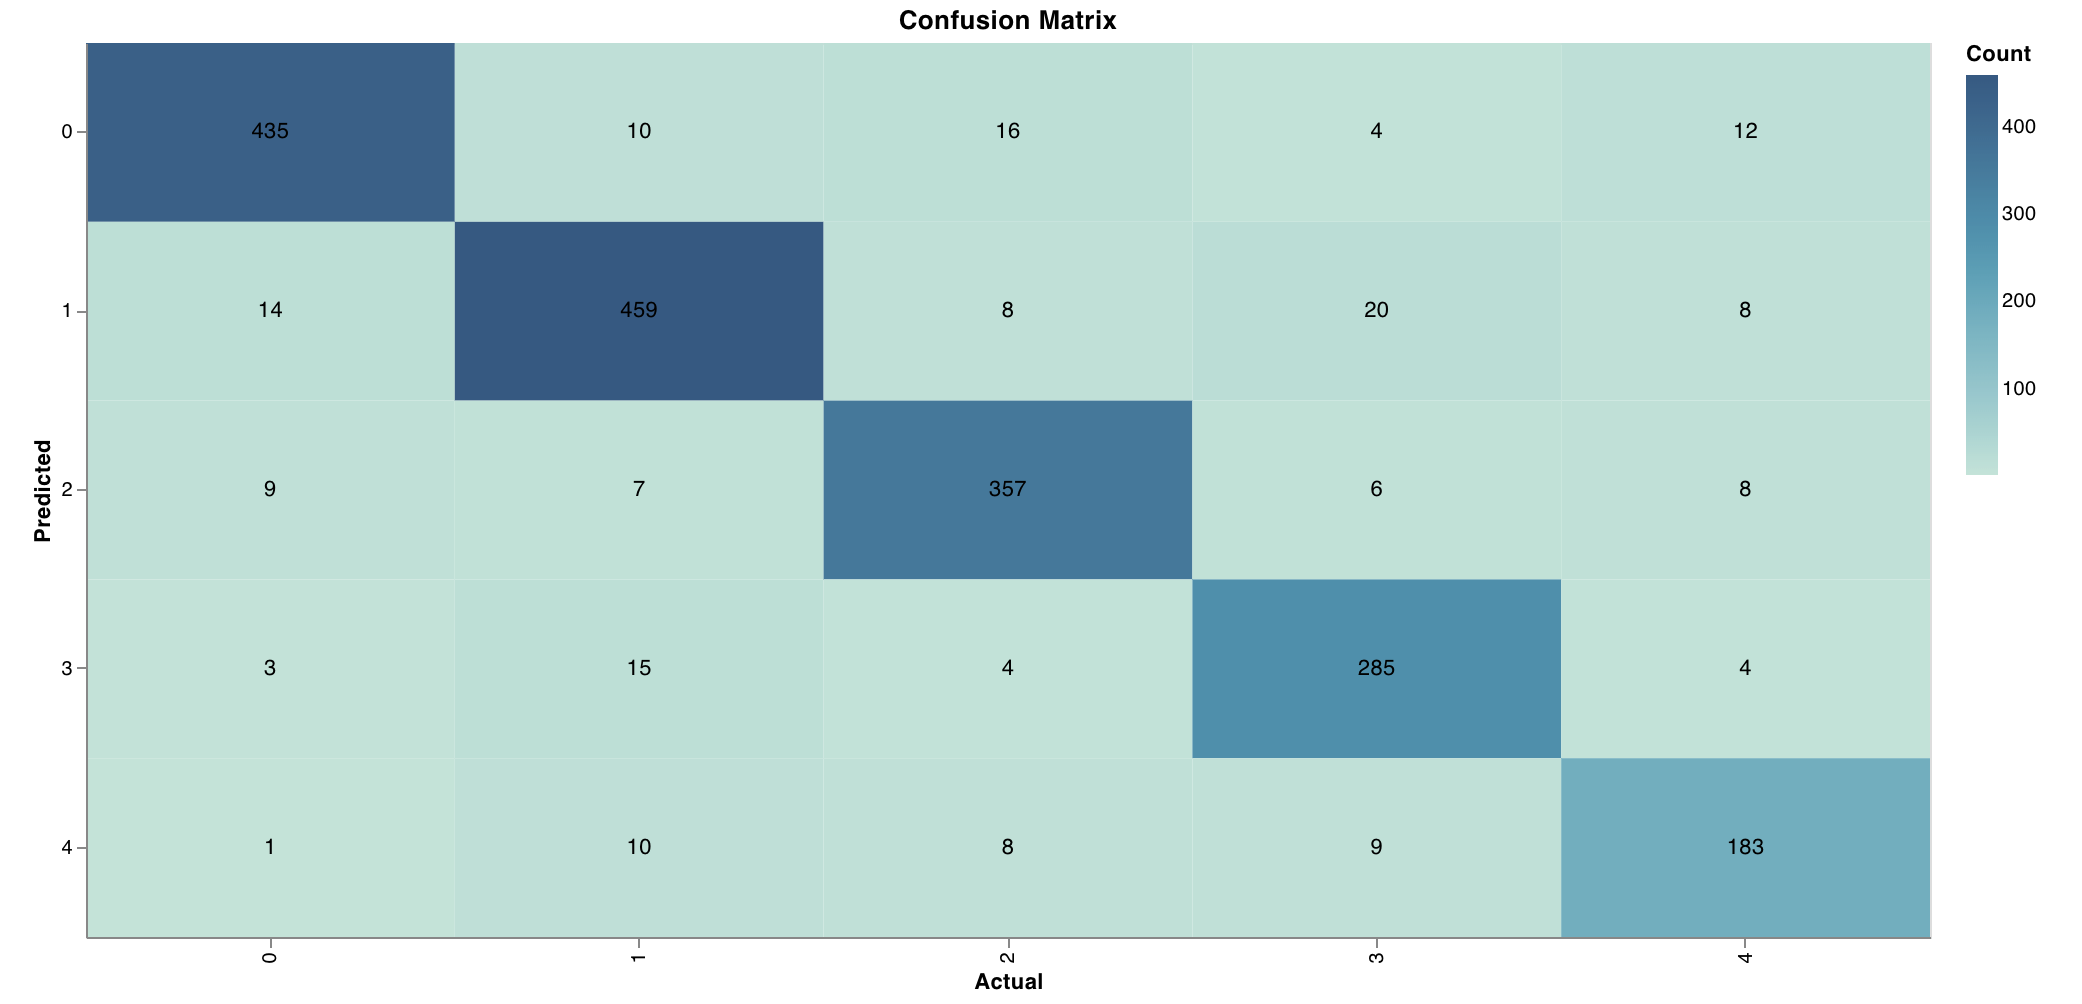

####NE, NT
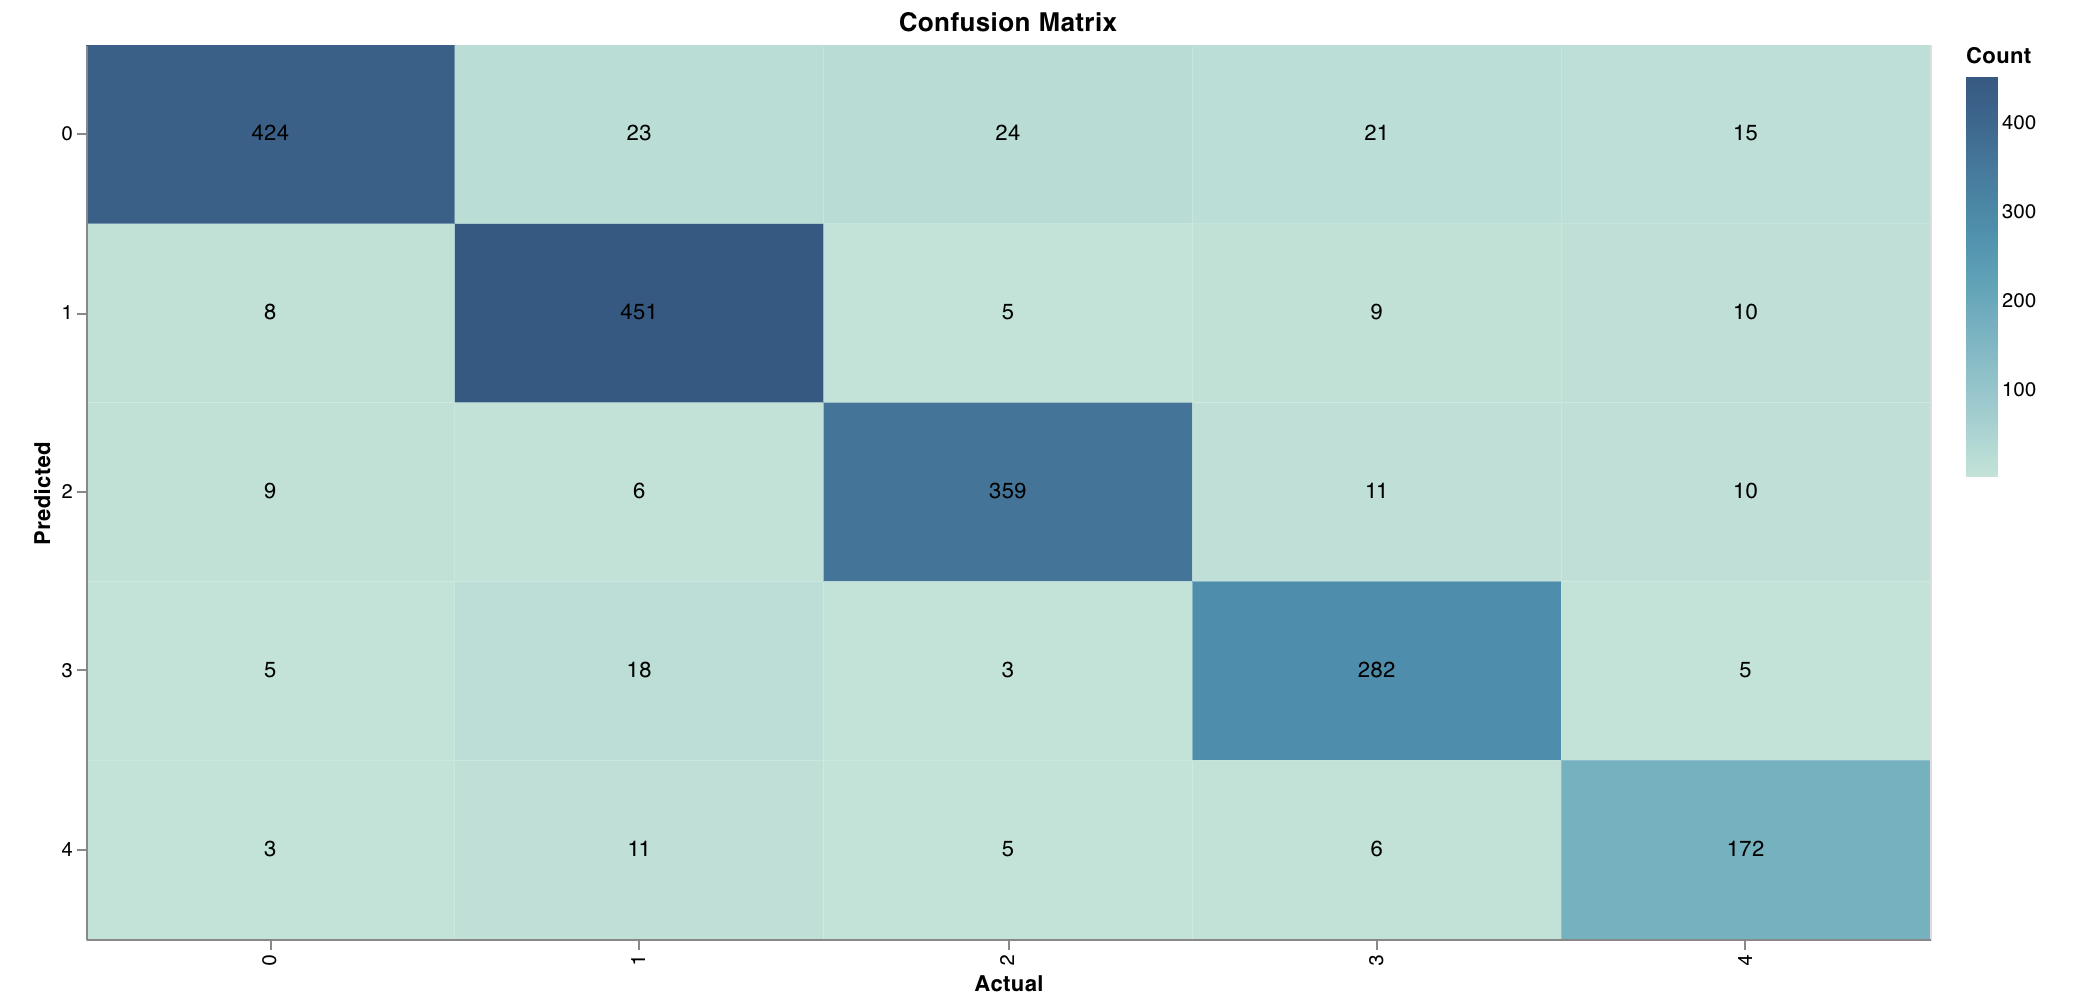

####DE, T
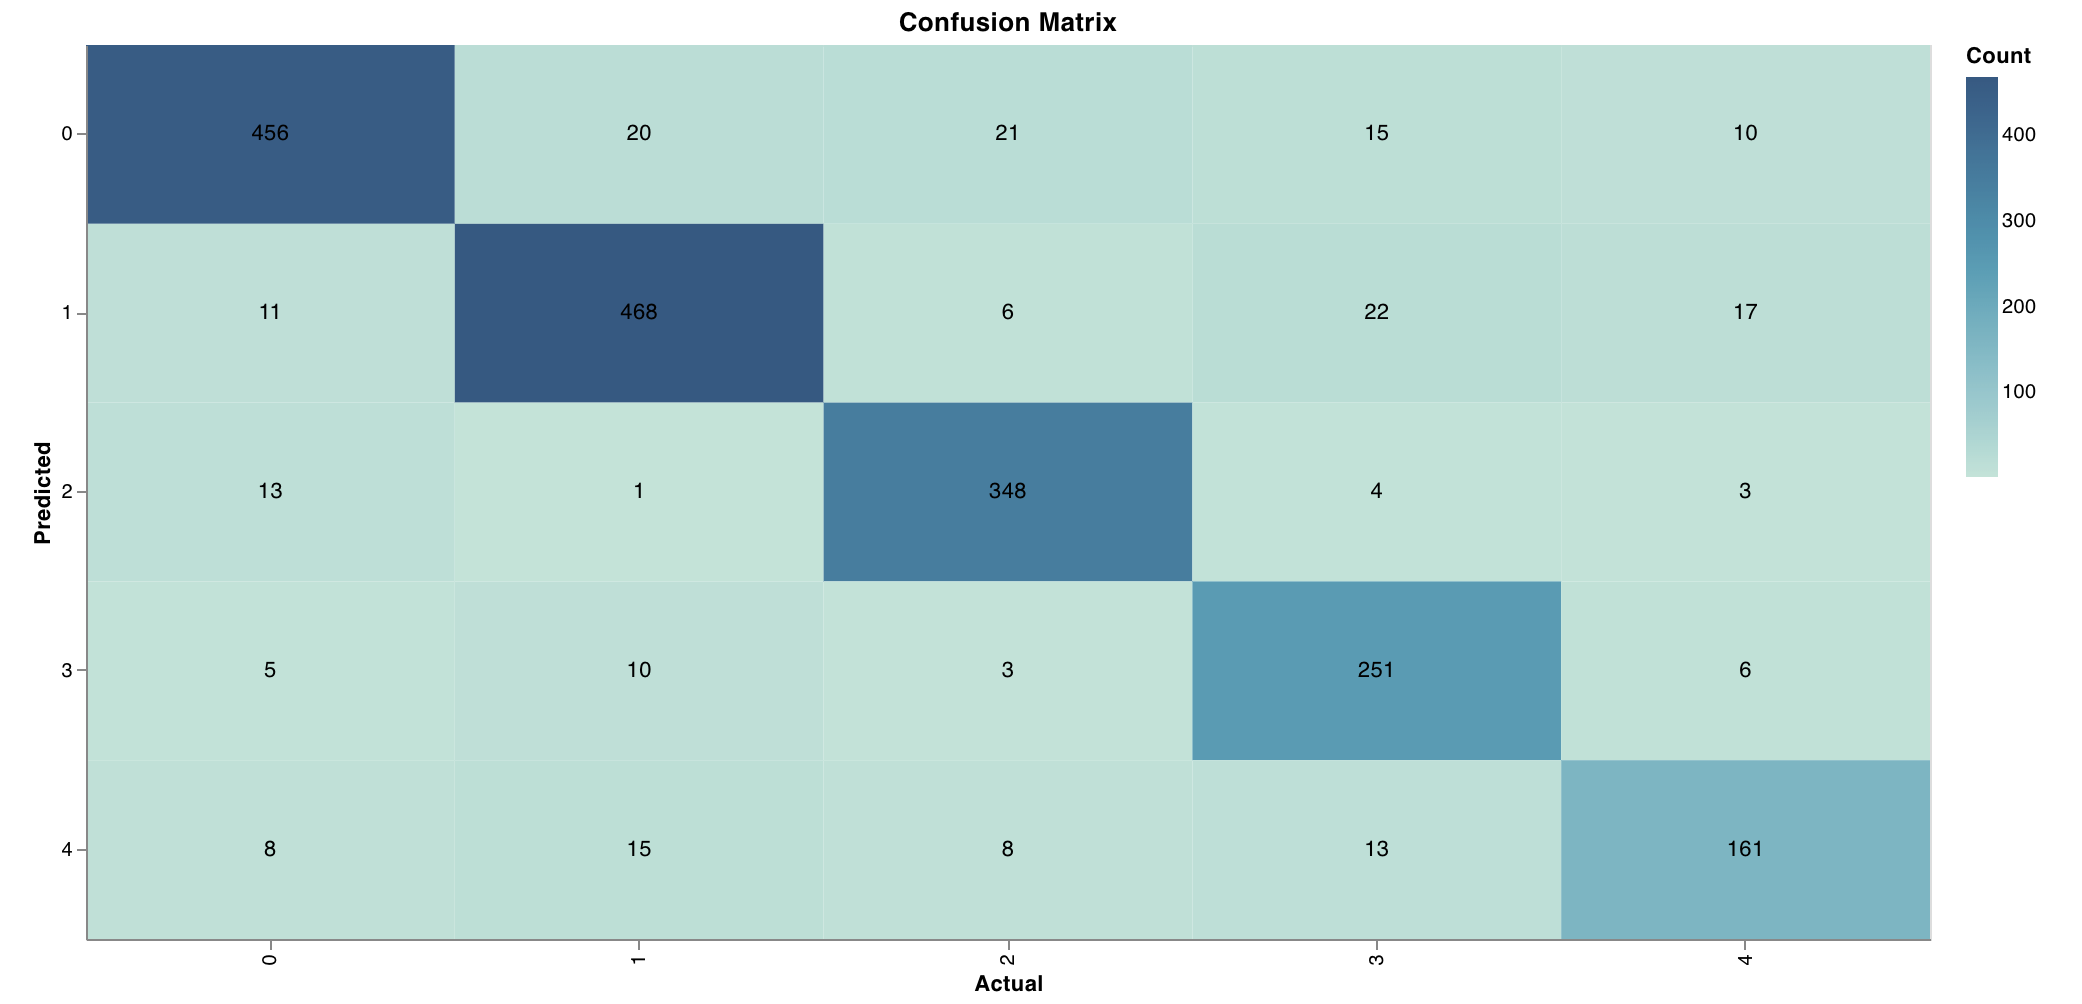

####DE, NT
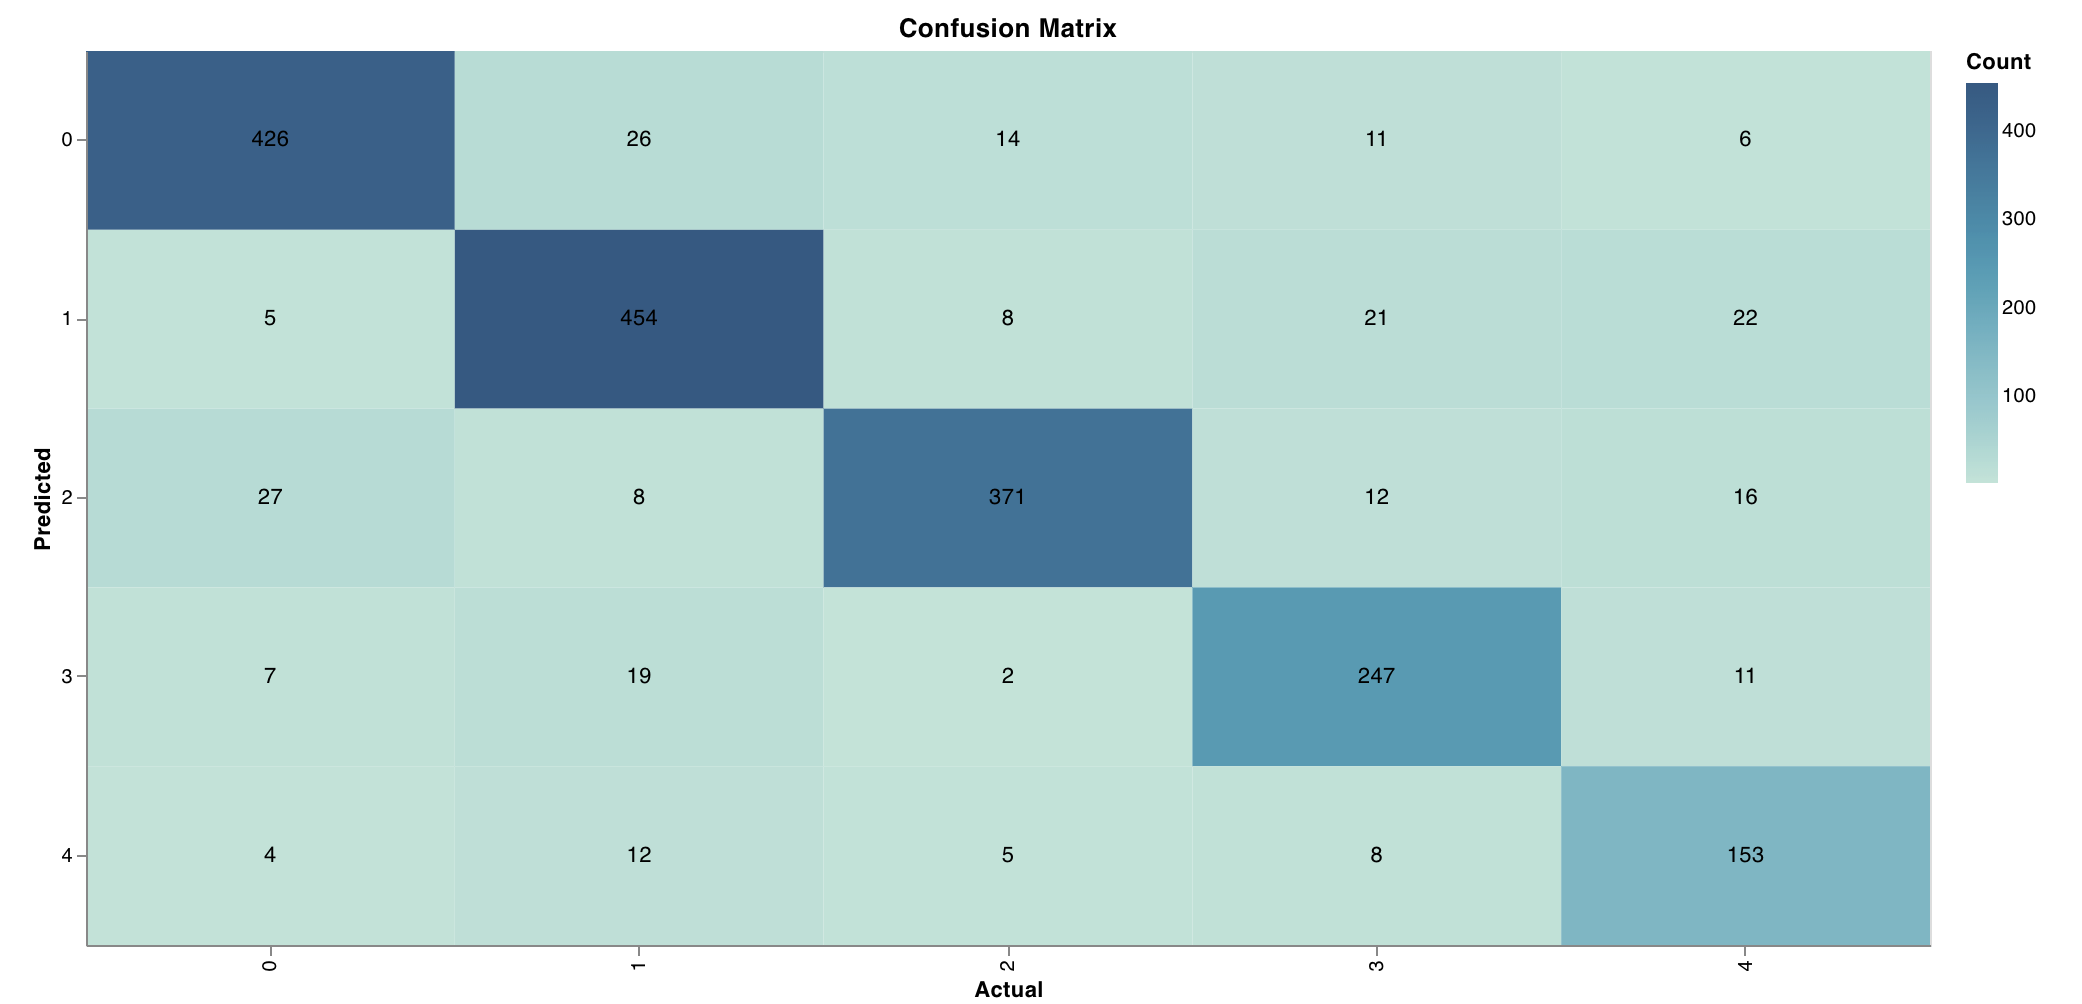

####E, T
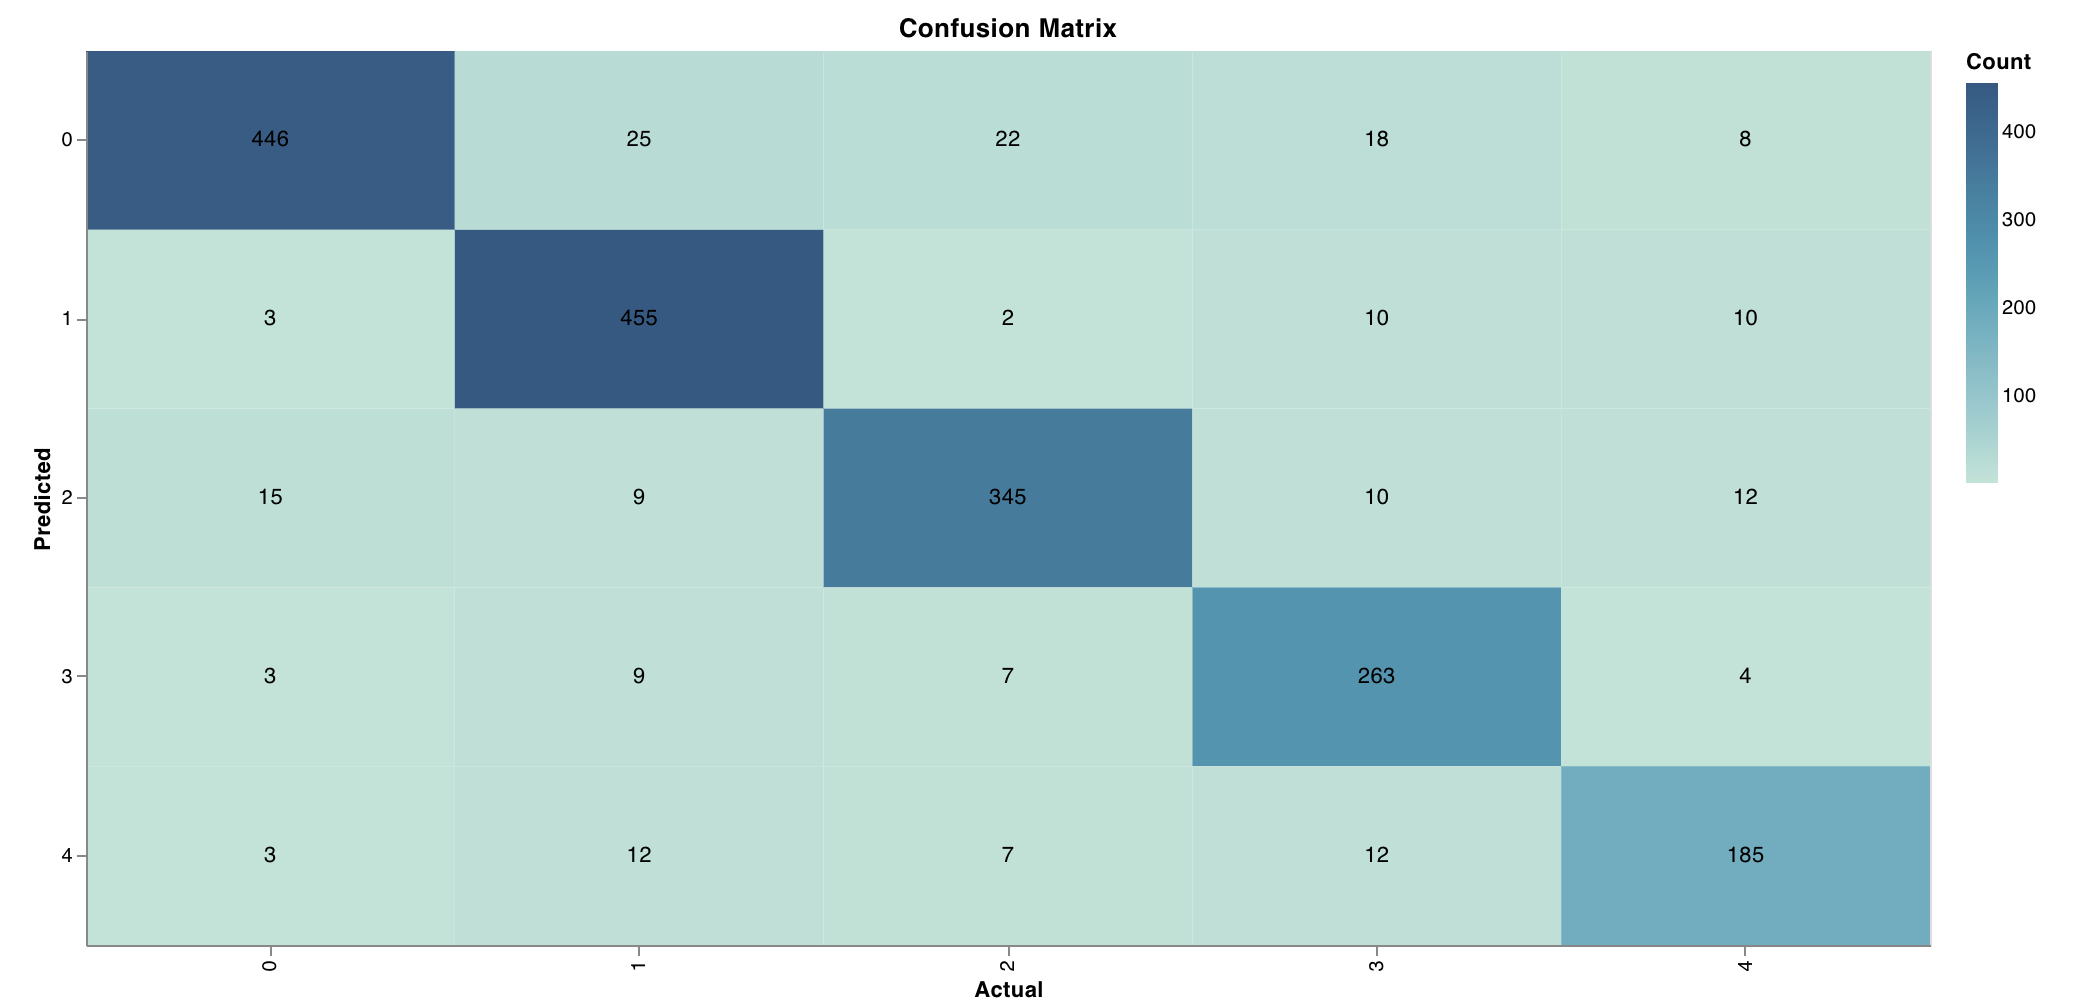

####E, NT
niestety nie udało się puścić do końca, wyczerpałem jakiś limit zasobów GPU, więc nie mam tej macierzy
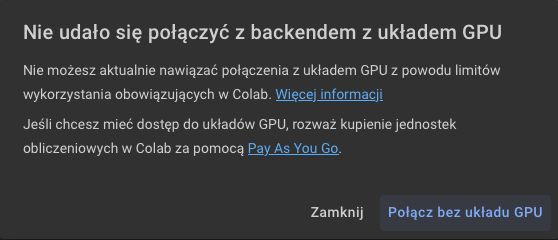



##Wnioski

  Z 6 wybranych przeze mnie sposobów oczyszczania danych, widać, że najlepiej się spisał model, gdzie emoji były opisane (w postaci angielskich słów, np. :heart:) i gdzie tagi zostały zachowane.
  Ma on najszybciej rosnące mcc, a także najniższy eval_loss

  Ogólnie każda para (T-NT) modeli pokazuje, że ta gdzie tagi zostały zachowane model trochę lepiej się trenował. Co do emoji (E-DT-NT), najlepiej się spisały opisane, a brak emoji podobnie co ich obecność w zwykłej formie (pewnie te modele po prostu nie zczytują emoji)

  Trochę mnie zdziwiło, że każdemu modelowi dość wcześnie zaczęło się podnosić eval_loss, ale tweety dzieliłem tylko na jeden sposób, więc może to dlatego - może jakby były dłuższe byłoby łatwiej. Obecnie do trenowania sklejałem po 3 tweety każdego użytkownika z top 20 z każdej partii.

  Z confuction matrices da się zauważyć, że jeśli modele się już myliły, to najczęściej myliły partie w 2 grupach, PiS-Konfederacja oraz PO-PL2050-Lewica, co może sugerować zliżony styl pisania danych użytkowników (w moim nioceniającym nikogo odczuciu także mówi nam o tym, że na Twitterze zwolennicy różnych partii piszą częściej o światopoglądzie, gdyż śmiałbym powiedzieć, że to w tym grupach mniej wiecej rozkładają się dwa główne podejścia światopoglądowe, różniące się od siebie dość mocno; za to nie widać wyraźnego podziału ze względu na program gospodarczy partii)